<a href="https://colab.research.google.com/github/juacastanori/TAM/blob/main/Parcial_2/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parcial 2 - TAM

Desarrollado por Juan Jerónimo Castaño Rivera -
                 Oscar Gutierrez -
                 Wilmer Sebastián Pérez

##Ejercicio 1

## 📌 UMAP (Uniform Manifold Approximation and Projection)

**Objetivo:** Encontrar una proyección de baja dimensión que preserve la estructura topológica local del espacio original (vecindarios).

---

### 📌 Modelo

UMAP parte de los siguientes supuestos teóricos:

- El conjunto de datos se distribuye sobre una variedad Riemanniana.
- La distancia local puede modelarse con una distribución de probabilidad.
- Es posible construir un grafo de conectividad local (con pesos difusos) en alta dimensión, y otro en baja dimensión, y hacer que estos se parezcan.

---

### 📌 Problema de optimización

1. **Construcción del grafo en alta dimensión:**

Se define una probabilidad condicional para cada par de puntos $x_i$, $x_j$:

$$
p_{j|i} = \exp \left( -\frac{\|x_i - x_j\|^2}{\sigma_i^2} \right)
$$

donde $\sigma_i$ es ajustado para que la entropía local esté relacionada con el número de vecinos `n_neighbors`.

Luego se simetriza con:

$$
w_{ij} = p_{i|j} + p_{j|i} - p_{i|j} \cdot p_{j|i}
$$

2. **Proyección a baja dimensión:**

Se parametriza la distancia entre proyecciones $y_i$, $y_j$ usando una función similar a la curva sigmoide:

$$
q_{ij} = \frac{1}{1 + a \|y_i - y_j\|^{2b}}
$$

Los parámetros $a$ y $b$ se eligen para ajustar la forma de la función.

3. **Función de costo (Cross-Entropy entre grafos):**

La pérdida total es:

$$
C = \sum_{(i,j)} \left[ w_{ij} \log q_{ij} + (1 - w_{ij}) \log (1 - q_{ij}) \right]
$$

---------------------------------------------------------------------------------------------

## 📌 PCA (Principal Component Analysis)

**Objetivo:** Encontrar una transformación lineal que proyecte los datos en un espacio de menor dimensión, maximizando la varianza de los datos proyectados.

---

### 📌 Modelo

Sea $X \in \mathbb{R}^{n \times d}$ la matriz de datos con $n$ muestras y $d$ características, previamente centrada (es decir, con media cero en cada columna).

PCA busca una proyección lineal $Z = XW$, donde $W \in \mathbb{R}^{d \times k}$ es una matriz cuyas columnas son los vectores propios de la matriz de covarianza de $X$, asociados a los $k$ mayores autovalores.

---

### 📌 Problema de optimización

La formulación clásica busca maximizar la varianza de los datos proyectados:

$$
\max_{W \in \mathbb{R}^{d \times k}} \ \operatorname{tr}(W^\top S W) \quad \text{sujeto a } W^\top W = I
$$

donde $S = \frac{1}{n} X^\top X$ es la matriz de covarianza muestral.

- La función objetivo $\operatorname{tr}(W^\top S W)$ es la traza de la matriz de covarianza proyectada.
- La restricción $W^\top W = I$ garantiza que los vectores de proyección son ortonormales.

---

### 📌 Solución

La solución óptima se obtiene seleccionando las $k$ **autovectores** principales de $S$, es decir, los vectores propios asociados a los $k$ **mayores autovalores**.

Estos definen las direcciones de máxima varianza, y la proyección $Z = XW$ representa los datos en un nuevo espacio de menor dimensión.

---

### 📌 Propiedades

- PCA es **no supervisado**: no requiere etiquetas.
- La dirección del primer componente captura la mayor varianza posible en los datos.
- La proyección preserva la **estructura global lineal** de los datos.

---


---------------------------------------------------------------------------------------------

## 📌 Gaussian Naive Bayes (GaussianNB)

**Objetivo:** Estimar la probabilidad de que una observación $x \in \mathbb{R}^d$ pertenezca a una clase $C_k$, bajo el supuesto de independencia condicional entre las características y que cada una sigue una distribución gaussiana por clase.

---

### 📌 Modelo

Dado un conjunto de datos de entrenamiento $D = \{(x_i, y_i)\}_{i=1}^n$ donde $x_i \in \mathbb{R}^d$ y $y_i \in \{C_1, C_2, \dots, C_K\}$, se modela la probabilidad posterior usando la regla de Bayes:

$$
P(C_k \mid x) = \frac{P(x \mid C_k) P(C_k)}{P(x)}
$$

Usando el supuesto de independencia condicional entre variables dadas las clases:

$$
P(x \mid C_k) = \prod_{j=1}^d P(x_j \mid C_k)
$$

Y suponiendo que cada $x_j \mid C_k$ sigue una distribución normal:

$$
P(x_j \mid C_k) = \mathcal{N}(x_j \mid \mu_{kj}, \sigma_{kj}^2)
$$

Por tanto, el modelo completo queda como:

$$
P(C_k \mid x) \propto P(C_k) \prod_{j=1}^d \mathcal{N}(x_j \mid \mu_{kj}, \sigma_{kj}^2)
$$

---

### 📌 Entrenamiento (Estimación de Parámetros)

El modelo no se entrena mediante una función de optimización explícita, sino que se realiza estimación directa por **máxima verosimilitud (MLE)**.

Para cada clase $C_k$, se estiman:

- La media de cada variable en la clase:

$$
\mu_{kj} = \frac{1}{N_k} \sum_{i : y_i = C_k} x_{ij}
$$

- La varianza de cada variable en la clase:

$$
\sigma_{kj}^2 = \frac{1}{N_k} \sum_{i : y_i = C_k} (x_{ij} - \mu_{kj})^2
$$

donde $N_k$ es el número de muestras con clase $C_k$.

La probabilidad a priori de la clase se estima como:

$$
P(C_k) = \frac{N_k}{n}
$$

---

### 📌 Clasificación

Dada una nueva observación $x$, se predice su clase como:

$$
\hat{y} = \arg\max_k \left[ \log P(C_k) + \sum_{j=1}^d \log \mathcal{N}(x_j \mid \mu_{kj}, \sigma_{kj}^2) \right]
$$

El uso de logaritmos convierte productos en sumas y mejora la estabilidad numérica.

---


## 📌 SGDClassifier (Stochastic Gradient Descent Classifier)

**Objetivo:** Resolver un problema de clasificación lineal (por ejemplo, regresión logística o SVM) optimizando una función de pérdida empírica regularizada usando descenso estocástico del gradiente.

---

### 📌 Modelo

El modelo busca encontrar un hiperplano que separe los datos de forma óptima, resolviendo el siguiente problema general:

$$
\min_{w \in \mathbb{R}^d, \ b \in \mathbb{R}} \ \frac{1}{n} \sum_{i=1}^n \mathcal{L}(y_i, w^\top x_i + b) + \lambda R(w)
$$

- $x_i \in \mathbb{R}^d$: vector de características de la muestra $i$
- $y_i \in \{-1, 1\}$ o $\{0, 1\}$: etiqueta de clase
- $\mathcal{L}$: función de pérdida (hinge, log, squared loss, etc.)
- $R(w)$: término de regularización (por ejemplo, $\|w\|_2^2$ o $\|w\|_1$)
- $\lambda > 0$: coeficiente de regularización

---

### 📌 Funciones de pérdida comunes

1. **Pérdida hinge (para SVM lineal):**

$$
\mathcal{L}_{\text{hinge}}(y, \hat{y}) = \max(0, 1 - y \cdot \hat{y})
$$

2. **Pérdida logística (para regresión logística):**

$$
\mathcal{L}_{\text{log}}(y, \hat{y}) = \log(1 + \exp(-y \cdot \hat{y}))
$$

3. **Pérdida cuadrática (para regresión):**

$$
\mathcal{L}_{\text{sq}}(y, \hat{y}) = (y - \hat{y})^2
$$

---

### 📌 Regularización

1. **L2 (Ridge):** penaliza la norma cuadrada de $w$

$$
R(w) = \frac{1}{2} \|w\|_2^2
$$

2. **L1 (Lasso):** penaliza la suma de valores absolutos

$$
R(w) = \|w\|_1
$$

3. **Elastic Net:** combinación convexa de L1 y L2

---

### 📌 Optimización

Se utiliza el método de **Stochastic Gradient Descent (SGD)**:

- En cada iteración, se toma una muestra aleatoria $(x_i, y_i)$
- Se calcula el gradiente estocástico de la función de pérdida + regularización
- Se actualizan los parámetros $(w, b)$ con una tasa de aprendizaje $\eta_t$

---

### 📌 Ventajas

- Escalable a grandes conjuntos de datos.
- Compatible con múltiples pérdidas y regularizaciones.
- Eficiente con datos dispersos.

---



## 📌 Logistic Regression

**Objetivo:** Modelar la probabilidad de que una observación pertenezca a una clase, utilizando una función logística sobre una combinación lineal de las variables de entrada.

---

### 📌 Modelo

Para un problema de clasificación binaria con datos $x_i \in \mathbb{R}^d$ y etiquetas $y_i \in \{0, 1\}$, se modela la probabilidad de la clase positiva como:

$$
P(y = 1 \mid x) = \sigma(w^\top x + b) = \frac{1}{1 + \exp(-w^\top x - b)}
$$

donde:
- $w \in \mathbb{R}^d$ es el vector de pesos,
- $b \in \mathbb{R}$ es el sesgo (bias),
- $\sigma(z)$ es la función logística o sigmoide.

---

### 📌 Problema de optimización

El objetivo es encontrar los parámetros $(w, b)$ que minimizan la pérdida logarítmica regularizada:

$$
\min_{w, b} \ \frac{1}{n} \sum_{i=1}^n \left[ -y_i \log(\hat{y}_i) - (1 - y_i) \log(1 - \hat{y}_i) \right] + \lambda R(w)
$$

donde:

- $\hat{y}_i = \sigma(w^\top x_i + b)$,
- $R(w)$ es un término de regularización (comúnmente L2),
- $\lambda \geq 0$ controla la penalización.

---

### 📌 Regularización

Por defecto, `LogisticRegression` en `scikit-learn` incluye **L2 regularization**:

$$
R(w) = \frac{1}{2} \|w\|_2^2
$$

También puede configurarse para usar **L1** o **Elastic Net**.

---

### 📌 Optimización

Se utilizan métodos de optimización como:

- **Gradiente descendente** (batch o mini-batch)
- **Newton-Raphson** o variantes como L-BFGS
- **liblinear** (para L1 o L2, eficiente en pequeños conjuntos)

---

### 📌 Predicción

Una vez entrenado el modelo, se predice la clase según:

$$
\hat{y} = \begin{cases}
1 & \text{si } \sigma(w^\top x + b) \geq 0.5 \\
0 & \text{si } \sigma(w^\top x + b) < 0.5
\end{cases}
$$

También es posible obtener la probabilidad estimada para la clase positiva.

---


## 📌 Linear Discriminant Analysis (LDA)

**Objetivo:** Encontrar una proyección lineal del espacio de características que maximice la separabilidad entre clases y minimice la varianza dentro de cada clase.

---

### 📌 Modelo

LDA modela cada clase como una distribución gaussiana multivariada con **igual matriz de covarianza** entre clases. Para una muestra $x \in \mathbb{R}^d$, y clases $C_k$, se asume:

$$
P(x \mid C_k) = \mathcal{N}(x \mid \mu_k, \Sigma)
$$

donde:
- $\mu_k$ es el vector de medias de la clase $C_k$,
- $\Sigma$ es la matriz de covarianza común a todas las clases.

Aplicando la regla de Bayes, se calcula:

$$
P(C_k \mid x) \propto P(C_k) \cdot \exp\left( -\frac{1}{2}(x - \mu_k)^\top \Sigma^{-1} (x - \mu_k) \right)
$$

---

### 📌 Clasificación

La clase predicha es la que maximiza la función discriminante lineal:

$$
\delta_k(x) = x^\top \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^\top \Sigma^{-1} \mu_k + \log P(C_k)
$$

Se asigna:

$$
\hat{y} = \arg\max_k \ \delta_k(x)
$$

---

### 📌 Problema de optimización (proyección)

Si se desea proyectar los datos a un espacio de menor dimensión con máxima separabilidad entre clases (proyección lineal $z = W^\top x$), se resuelve el siguiente problema:

$$
\max_W \ \operatorname{tr} \left( (W^\top S_W W)^{-1} W^\top S_B W \right)
$$

donde:

- $S_W$ es la **matriz de dispersión intra-clase**:

$$
S_W = \sum_{k=1}^K \sum_{x_i \in C_k} (x_i - \mu_k)(x_i - \mu_k)^\top
$$

- $S_B$ es la **matriz de dispersión entre clases**:

$$
S_B = \sum_{k=1}^K n_k (\mu_k - \mu)(\mu_k - \mu)^\top
$$

- $W$ es la matriz de proyección.

---

### 📌 Solución

Se resuelve mediante un problema de **autovalores generalizados**, y se seleccionan los vectores propios asociados a los mayores autovalores de $S_W^{-1} S_B$.

La dimensión máxima del espacio proyectado es $K - 1$ donde $K$ es el número de clases.

---


## 📌 KNeighborsClassifier (K-Nearest Neighbors)

**Objetivo:** Clasificar una nueva muestra asignándola a la clase más frecuente entre sus $k$ vecinos más cercanos en el conjunto de entrenamiento.

---

### 📌 Modelo

El algoritmo no aprende explícitamente un modelo paramétrico, sino que mantiene todo el conjunto de entrenamiento. La predicción se basa en una métrica de distancia para buscar los $k$ puntos más cercanos a una muestra nueva.

Dado un conjunto de entrenamiento:

$$
D = \{(x_i, y_i)\}_{i=1}^n, \quad x_i \in \mathbb{R}^d, \quad y_i \in \{C_1, \dots, C_K\}
$$

Para una muestra nueva $x$, se define la función de predicción como:

$$
\hat{y} = \operatorname{mode} \left( \{y_i \ | \ x_i \in \mathcal{N}_k(x)\} \right)
$$

donde $\mathcal{N}_k(x)$ representa el conjunto de los $k$ vecinos más cercanos a $x$ bajo alguna métrica de distancia, usualmente:

- **Euclidiana**: $\|x - x_i\|_2$
- **Manhattan**: $\|x - x_i\|_1$
- **Minkowski**, etc.

---

### 📌 No requiere entrenamiento

- KNN no tiene una fase de entrenamiento explícita (modelo perezoso).
- Todo el costo computacional ocurre en la **fase de predicción**.

---

### 📌 Parámetros importantes

- $k$: número de vecinos a considerar.
- Métrica de distancia.
- Peso por vecino: uniforme o inversamente proporcional a la distancia.

---

### 📌 Variante ponderada

Cuando se usa ponderación por distancia:

$$
\hat{y} = \arg\max_c \sum_{x_i \in \mathcal{N}_k(x)} \mathbb{1}[y_i = c] \cdot w_i
$$

donde los pesos $w_i$ pueden ser definidos como:

$$
w_i = \frac{1}{\|x - x_i\| + \epsilon}
$$

para algún pequeño $\epsilon > 0$.

---

### 📌 Ventajas

- Intuitivo y fácil de implementar.
- Sin entrenamiento, útil para prototipos rápidos.
- Flexible en la elección de distancia y tipo de dato.

---

### 📌 Desventajas

- Costoso en tiempo de predicción (requiere computar $n$ distancias).
- Sensible a la escala de los datos (recomendado normalizar).
- Sensible al ruido si $k$ es muy bajo.

---


## 📌 SVC (Support Vector Classifier)

**Objetivo:** Encontrar un hiperplano que maximice el margen entre dos clases, permitiendo cierto grado de error (margen suave) y con capacidad para usar núcleos no lineales.

---

### 📌 Modelo lineal (sin núcleo)

Dado un conjunto de entrenamiento:

$$
D = \{(x_i, y_i)\}_{i=1}^n, \quad x_i \in \mathbb{R}^d, \quad y_i \in \{-1, +1\}
$$

El objetivo es encontrar un vector de pesos $w$ y sesgo $b$ que definan un hiperplano separador:

$$
f(x) = \text{sign}(w^\top x + b)
$$

con el **mayor margen posible**, lo que se traduce en el siguiente problema de optimización:

---

### 📌 Problema de optimización (margen suave)

$$
\min_{w, b, \xi} \ \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i
$$

sujeto a:

$$
y_i (w^\top x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad i = 1, \dots, n
$$

- $\|w\|^2$ controla el **ancho del margen** (regularización).
- $C > 0$ controla el **compromiso entre margen y error**.
- $\xi_i$ son variables de holgura que permiten errores.

---

### 📌 Forma dual y uso de núcleos

El problema puede expresarse en su **forma dual**, lo cual permite utilizar un **núcleo** $K(x_i, x_j)$ para manejar datos no linealmente separables:

$$
f(x) = \text{sign} \left( \sum_{i=1}^n \alpha_i y_i K(x, x_i) + b \right)
$$

donde:
- $K(x, x')$ es una función núcleo (kernel),
- $\alpha_i$ son multiplicadores de Lagrange (solo > 0 para vectores de soporte).

---

### 📌 Núcleos comunes

- **Lineal**: $K(x, x') = x^\top x'$
- **Polinomial**: $K(x, x') = (x^\top x' + r)^d$
- **RBF (Gaussiano)**: $K(x, x') = \exp(-\gamma \|x - x'\|^2)$
- **Sigmoide**: $K(x, x') = \tanh(\kappa x^\top x' + c)$

---

### 📌 Propiedades

- Solo unos pocos puntos (vectores de soporte) determinan el modelo.
- Generaliza bien con un margen amplio.
- Puede manejar separación no lineal gracias a los núcleos.

---

### 📌 Consideraciones

- El parámetro $C$ regula el balance entre margen ancho y errores.
- El parámetro $\gamma$ regula la flexibilidad del kernel RBF.
- Conviene escalar las características antes de entrenar.

---


## 📌 RandomForestClassifier

**Objetivo:** Clasificar muestras utilizando un conjunto (ensamble) de árboles de decisión construidos sobre subconjuntos aleatorios del conjunto de entrenamiento y características.

---

### 📌 Modelo

Random Forest es un método de **ensamble** basado en el principio de *Bagging* (Bootstrap Aggregating), aplicado a árboles de decisión.

Consiste en entrenar múltiples clasificadores (árboles) sobre subconjuntos diferentes del conjunto de entrenamiento y promediar sus salidas para obtener una predicción más robusta y con menor varianza.

---

### 📌 Construcción del modelo

Sea el conjunto de entrenamiento:

$$
D = \{(x_i, y_i)\}_{i=1}^n
$$

El Random Forest construye $T$ árboles $\{h_t(x)\}_{t=1}^T$ de la siguiente forma:

1. Para cada árbol $t$:
   - Se toma una muestra bootstrap $D_t$ (con reemplazo) del conjunto original.
   - En cada nodo, se selecciona aleatoriamente un subconjunto de características de tamaño $m$ (con $m < d$).
   - Se elige la mejor división solo entre esas $m$ características (mediante ganancia de información, Gini, etc.).

---

### 📌 Predicción

Para una nueva muestra $x$, se predice la clase por **votación mayoritaria** entre los árboles:

$$
\hat{y} = \operatorname{mode} \left\{ h_1(x), h_2(x), \dots, h_T(x) \right\}
$$

En clasificación probabilística, también puede usarse:

$$
P(y = c \mid x) = \frac{1}{T} \sum_{t=1}^T \mathbb{1}[h_t(x) = c]
$$

---

### 📌 Ventajas

- Generaliza bien incluso sin mucha parametrización.
- Reduce la **varianza** de modelos individuales como árboles.
- Funciona bien con datos mixtos (numéricos y categóricos).
- Permite estimar la **importancia de características**.

---

### 📌 Hiperparámetros importantes

- $T$ (n\_estimators): número de árboles.
- max\_features: número de atributos considerados por nodo.
- max\_depth: profundidad máxima de los árboles.
- min\_samples\_split / min\_samples\_leaf: controlan el tamaño mínimo de nodos para dividir.

---

### 📌 Consideraciones

- No requiere normalización de características.
- Puede sobreajustar si los árboles son muy profundos y el número de árboles es muy pequeño.
- Tiene buena tolerancia al ruido y a datos faltantes (si se maneja apropiadamente).

---


## 📌 GaussianProcessClassifier

**Objetivo:** Modelar la probabilidad de clasificación mediante un proceso estocástico no paramétrico, que define una distribución sobre funciones utilizando un enfoque bayesiano.

---

### 📌 Modelo

Un **Proceso Gaussiano (GP)** es una distribución sobre funciones, definido por una **media** y una **covarianza (kernel)**. En clasificación binaria, se modela una función latente $f(x)$ como:

$$
f(x) \sim \mathcal{GP}(0, k(x, x'))
$$

donde:
- $f(x)$ es una función latente,
- $k(x, x')$ es una función núcleo (kernel), por ejemplo RBF, Matérnico, etc.

La probabilidad de clase se obtiene aplicando una función sigmoidal a la salida del GP:

$$
P(y = 1 \mid x) = \Phi(f(x))
$$

donde $\Phi(\cdot)$ puede ser la función logística o la función sigmoide (probit/logit link).

---

### 📌 Problema de optimización (aprendizaje bayesiano)

Dado un conjunto de entrenamiento:

$$
D = \{(x_i, y_i)\}_{i=1}^n, \quad y_i \in \{0, 1\}
$$

El objetivo es calcular la distribución posterior sobre la función latente $f$ y usarla para predecir:

$$
P(y_* \mid x_*, X, y) = \int P(y_* \mid f_*) \cdot P(f_* \mid x_*, X, y) \, df_*
$$

Esto no es resoluble analíticamente (por la función sigmoidal), por lo que se usa una **aproximación variacional** o **Laplace approximation** para la inferencia.

---

### 📌 Inferencia aproximada

El modelo aplica métodos como:

- **Laplace approximation**: aproxima la distribución posterior con una normal alrededor del modo.
- **EP (Expectation Propagation)**: aproxima los términos no gaussianos.

---

### 📌 Predicción

Dada una nueva entrada $x_*$, se calcula la distribución predictiva sobre $f_*$:

$$
f_* \sim \mathcal{N}(\mu_*, \sigma_*^2)
$$

Y se obtiene la probabilidad de clase:

$$
P(y_* = 1 \mid x_*) = \int \Phi(f_*) \cdot \mathcal{N}(f_* \mid \mu_*, \sigma_*^2) \, df_*
$$

---

### 📌 Ventajas

- Modelo **no paramétrico**: se adapta a la complejidad de los datos.
- Proporciona **incertidumbre** sobre las predicciones.
- Muy flexible con selección adecuada del kernel.

---

### 📌 Desventajas

- Escala cúbica en el número de muestras ($\mathcal{O}(n^3)$) → ineficiente en datasets grandes.
- Necesita inferencia aproximada → más lento que métodos clásicos.
- Requiere seleccionar un buen kernel y sus hiperparámetros.

---

### 📌 Hiperparámetros

- Tipo de kernel: RBF, Matern, DotProduct, etc.
- Parámetros del kernel: longitud de escala, varianza.
- Aproximación utilizada: Laplace o EP.

---


## 📌 Clasificadores basados en Deep Learning

**Objetivo:** Aprender una función de decisión no lineal compleja mediante una red neuronal profunda, optimizando una función de pérdida basada en probabilidad (como entropía cruzada) y regularización.

---

### 📌 Modelo

El modelo más básico es un **Perceptrón Multicapa (MLP)**, también conocido como red neuronal feedforward. Está compuesto por capas de neuronas que realizan transformaciones afines seguidas de funciones de activación no lineales.

Para una entrada $x \in \mathbb{R}^d$, una red con $L$ capas tiene la forma:

$$
\begin{aligned}
h^{(0)} &= x \\
h^{(1)} &= \sigma^{(1)}(W^{(1)} h^{(0)} + b^{(1)}) \\
h^{(2)} &= \sigma^{(2)}(W^{(2)} h^{(1)} + b^{(2)}) \\
&\vdots \\
h^{(L)} &= \sigma^{(L)}(W^{(L)} h^{(L-1)} + b^{(L)})
\end{aligned}
$$

- $W^{(\ell)}$, $b^{(\ell)}$: pesos y sesgos de la capa $\ell$.
- $\sigma^{(\ell)}$: función de activación (ReLU, tanh, sigmoid, etc.).
- $h^{(L)}$ es la salida de la red (por ejemplo, logits o probabilidades).

---

### 📌 Problema de optimización

Para clasificación binaria o multiclase, se usa la **entropía cruzada** como función de pérdida:

- Binaria:

$$
\mathcal{L}(y, \hat{y}) = - y \log \hat{y} - (1 - y) \log (1 - \hat{y})
$$

- Multiclase (softmax + cross-entropy):

$$
\mathcal{L}(y, \hat{y}) = - \sum_{k=1}^K y_k \log \hat{y}_k
$$

El problema general es:

$$
\min_{\theta} \ \frac{1}{n} \sum_{i=1}^n \mathcal{L}(y_i, f_\theta(x_i)) + \lambda R(\theta)
$$

donde:
- $\theta$ son todos los pesos y sesgos de la red,
- $R(\theta)$ es una función de regularización (como L2).

---

### 📌 Optimización

- Algoritmos comunes: SGD, Adam, RMSProp, etc.
- Entrenamiento en lotes (batch training).
- Se usa retropropagación del gradiente (Backpropagation).

---

### 📌 Funciones de activación comunes

- ReLU: $\max(0, x)$
- Sigmoid: $\sigma(x) = \frac{1}{1 + e^{-x}}$
- Softmax: $\text{softmax}(z)_k = \frac{e^{z_k}}{\sum_j e^{z_j}}$

---

### 📌 Ventajas

- Capacidad de representar funciones complejas y no lineales.
- Escalables a grandes volúmenes de datos.
- Se adaptan a diferentes tipos de entrada (tabular, imagen, texto, etc.).

---

### 📌 Desventajas

- Requiere mayor cantidad de datos para entrenar bien.
- Costoso computacionalmente.
- Hiperparámetros delicados (número de capas, neuronas, learning rate, etc.).

---

### 📌 Consideraciones prácticas

- Normalizar datos de entrada (por ejemplo, con StandardScaler).
- Usar validación cruzada o conjunto de validación para evitar sobreajuste.
- Aplicar regularización como dropout o weight decay para mejorar generalización.

---


##Ejercicio 2

### Descripción del dataset USPS

El conjunto de datos **USPS (United States Postal Service)** es una colección clásica utilizada para tareas de clasificación de imágenes, particularmente en problemas de reconocimiento de dígitos manuscritos.

- **Formato de las muestras**: imágenes en escala de grises de **16×16 píxeles** (256 características por muestra).
- **Rango de valores**: cada píxel toma valores numéricos en un rango estandarizado (normalmente entre 0 y 255 o normalizado a [-1, 1]).
- **Etiquetas**: dígitos del **0 al 9**, representados como números enteros (`int`) o en formato one-hot para modelos de clasificación multiclase.
- **Particiones del dataset**:
  - `X_train`: 7291 muestras de entrenamiento.
  - `y_train`: etiquetas correspondientes (0–9).
  - `X_test`: 2007 muestras de prueba.
  - `y_test`: etiquetas correspondientes.

Este dataset ha sido ampliamente utilizado como banco de pruebas para comparar algoritmos de clasificación supervisada, reducción de dimensionalidad, visualización y aprendizaje profundo. A diferencia del famoso MNIST, el USPS contiene imágenes de menor resolución, lo que lo hace ideal para modelos ligeros y tareas de visualización en espacios reducidos como PCA o UMAP.


In [ ]:
# ─── DESCARGAR ARCHIVO DESDE GOOGLE DRIVE ────────────────────────────────────
!pip install --quiet gdown
!gdown --id 1RlJkocG7354lh4jMn0onmG9a0u8CRvez -O usps.h5

# Instalar UMAP si aún no está instalado
!pip install umap-learn --quiet

import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
from google.colab import files
import umap
from umap import UMAP

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RlJkocG7354lh4jMn0onmG9a0u8CRvez
To: /content/usps.h5
100% 2.91M/2.91M [00:00<00:00, 74.7MB/s]


In [ ]:
# Inspeccionar estructura del archivo
with h5py.File("usps.h5", "r") as f:
    print("📁 Claves principales en el archivo:")
    for key in f.keys():
        print(" -", key)

    # Si hay grupos internos, inspeccionarlos también
    def recorrer_grupo(grupo, indent=1):
        for clave in grupo:
            print("  " * indent + "↳", clave)
            if isinstance(grupo[clave], h5py.Group):
                recorrer_grupo(grupo[clave], indent + 1)

    recorrer_grupo(f)



📁 Claves principales en el archivo:
 - test
 - train
  ↳ test
    ↳ data
    ↳ target
  ↳ train
    ↳ data
    ↳ target


In [ ]:
with h5py.File("usps.h5", "r") as f:
    X_train = np.array(f["train"]["data"])    # imágenes de entrenamiento
    y_train = np.array(f["train"]["target"])  # etiquetas de entrenamiento
    X_test = np.array(f["test"]["data"])      # imágenes de prueba
    y_test = np.array(f["test"]["target"])    # etiquetas de prueba

# Unificar todo el conjunto si se desea
X = np.concatenate([X_train, X_test], axis=0)
y = np.concatenate([y_train, y_test], axis=0)

print("✅ Dataset cargado correctamente")
print("🧩 X shape:", X.shape)
print("🔢 y shape:", y.shape)
print("Etiquetas únicas:", np.unique(y))


✅ Dataset cargado correctamente
🧩 X shape: (9298, 256)
🔢 y shape: (9298,)
Etiquetas únicas: [0 1 2 3 4 5 6 7 8 9]


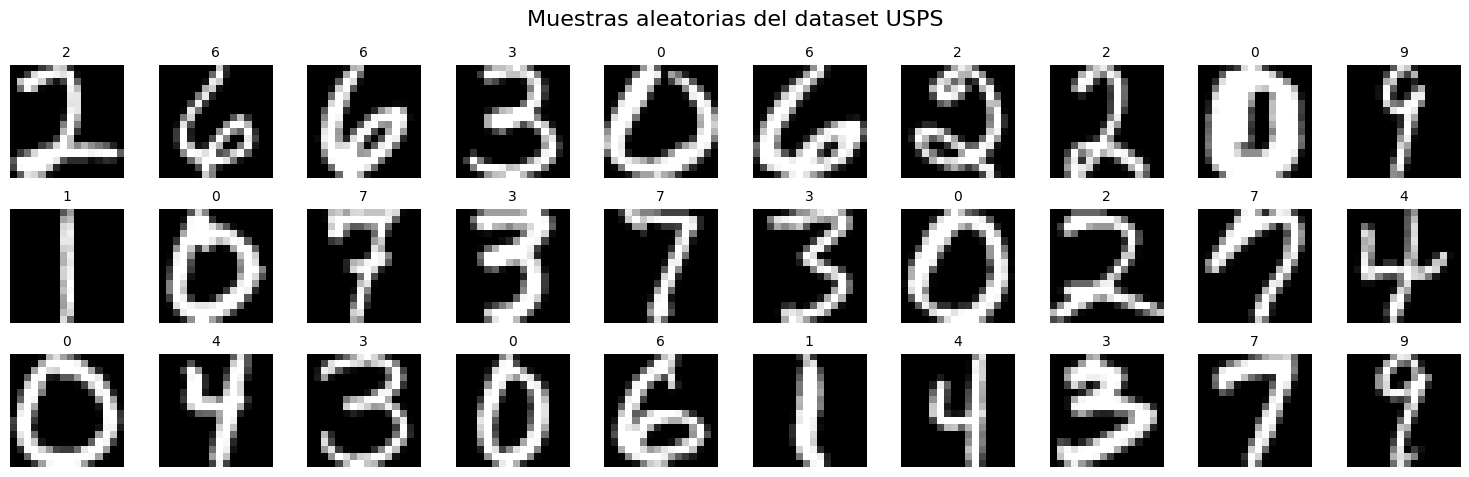

In [ ]:
def mostrar_imagenes_usps(X, y, filas=3, columnas=10):
    fig, axes = plt.subplots(filas, columnas, figsize=(1.5 * columnas, 1.5 * filas))
    indices = np.random.choice(len(X), filas * columnas, replace=False)

    for i, ax in enumerate(axes.flat):
        imagen = X[indices[i]].reshape(16, 16)
        etiqueta = y[indices[i]]
        ax.imshow(imagen, cmap='gray')
        ax.set_title(f"{etiqueta}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.suptitle("Muestras aleatorias del dataset USPS", fontsize=16, y=1.05)
    plt.show()

mostrar_imagenes_usps(X, y)


In [ ]:
# ─── ESCALADO DE DATOS (IMPORTANTE PARA PCA) ─────────────────────────────────
X_scaled = StandardScaler().fit_transform(X)

# ─── PCA A 2 DIMENSIONES ─────────────────────────────────────────────────────
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Varianza explicada total (2 componentes): {np.sum(pca.explained_variance_ratio_):.4f}")


Varianza explicada total (2 componentes): 0.2243


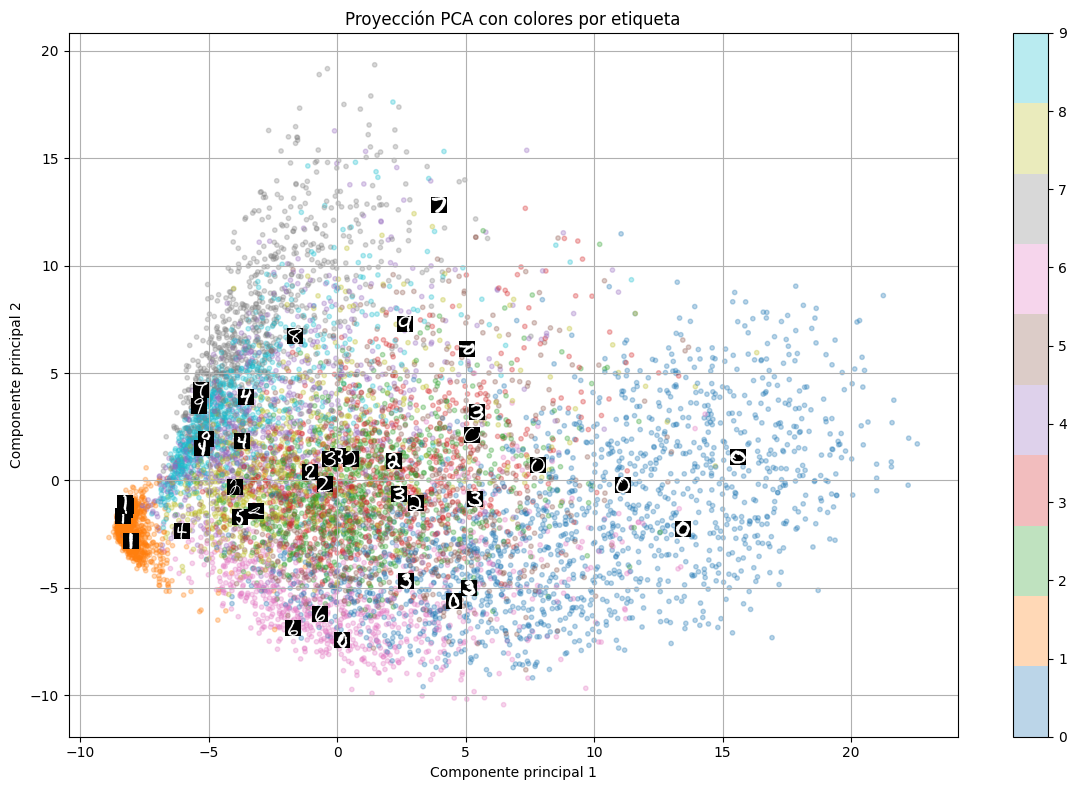

In [ ]:
# ─── FUNCIONES PARA SUPERPONER IMÁGENES SOBRE EL ESPACIO 2D ─────────────────
def plot_pca_with_images(X_proj, X_img, labels, num_images=40, figsize=(12, 8)):
    plt.figure(figsize=figsize)

    # Graficar puntos coloreados por etiqueta
    scatter = plt.scatter(X_proj[:, 0], X_proj[:, 1], c=labels, cmap='tab10', alpha=0.3, s=10)
    plt.colorbar(scatter, ticks=np.arange(10))
    plt.title("Proyección PCA con colores por etiqueta")

    # Agregar imágenes superpuestas en posiciones aleatorias
    indices = np.random.choice(len(X_proj), size=num_images, replace=False)
    for i in indices:
        img = X_img[i].reshape(16, 16)
        imagebox = OffsetImage(img, cmap='gray', zoom=0.7)
        ab = AnnotationBbox(imagebox, (X_proj[i, 0], X_proj[i, 1]), frameon=False)
        plt.gca().add_artist(ab)

    plt.xlabel("Componente principal 1")
    plt.ylabel("Componente principal 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ─── VISUALIZAR ──────────────────────────────────────────────────────────────
plot_pca_with_images(X_pca, X, y)


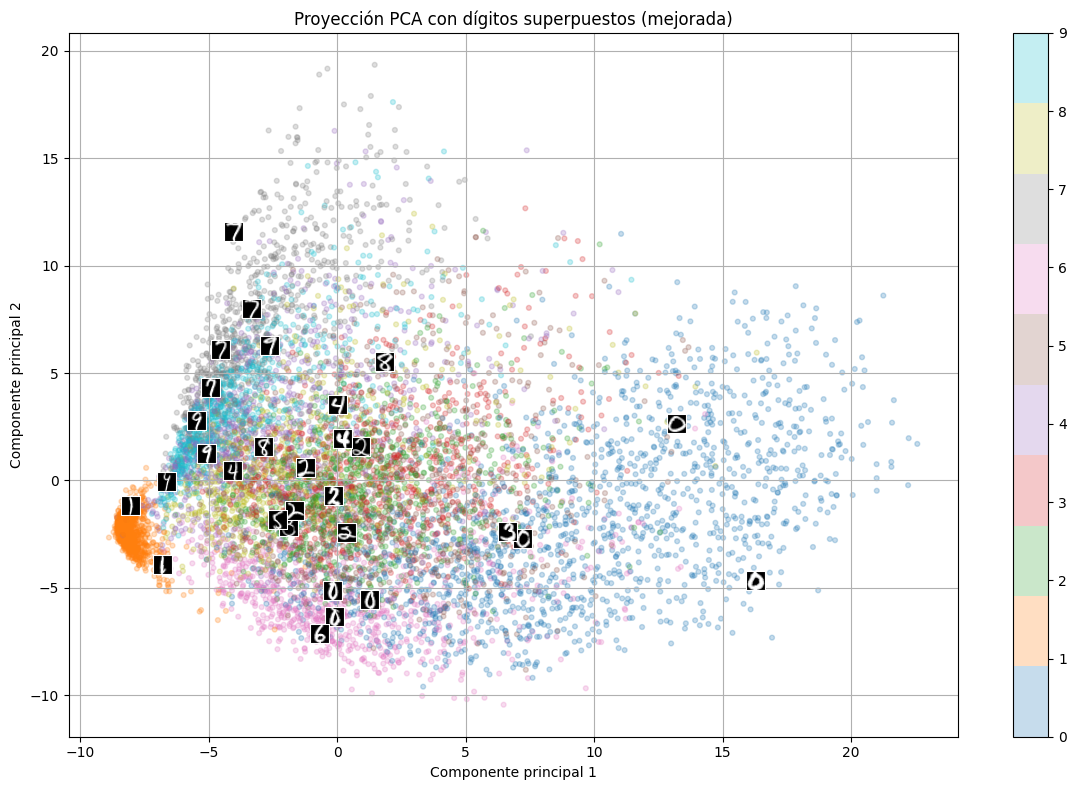

In [ ]:
def plot_pca_with_images_improved(X_proj, X_img, labels, num_images=30, figsize=(12, 8)):
    plt.figure(figsize=figsize)

    # Dibujar puntos de fondo
    scatter = plt.scatter(X_proj[:, 0], X_proj[:, 1], c=labels, cmap='tab10', alpha=0.25, s=12)
    plt.colorbar(scatter, ticks=np.arange(10))
    plt.title("Proyección PCA con dígitos superpuestos (mejorada)")

    # Seleccionar índices aleatorios para superponer imágenes
    indices = np.random.choice(len(X_proj), size=num_images, replace=False)

    for i in indices:
        image = X_img[i].reshape(16, 16)
        # Crear imagen con borde blanco
        bordered_img = np.pad(image, pad_width=1, mode='constant', constant_values=1.0)
        imagebox = OffsetImage(bordered_img, cmap='gray', zoom=0.8)
        ab = AnnotationBbox(imagebox, (X_proj[i, 0], X_proj[i, 1]), frameon=False)
        plt.gca().add_artist(ab)

    plt.xlabel("Componente principal 1")
    plt.ylabel("Componente principal 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ─── LLAMADA MEJORADA ────────────────────────────────────────────────────────
plot_pca_with_images_improved(X_pca, X, y)


In [ ]:
# Aplicar PCA conservando todos los componentes posibles
pca_full = PCA().fit(X_scaled)

# Calcular varianza explicada acumulada
var_acumulada = np.cumsum(pca_full.explained_variance_ratio_)


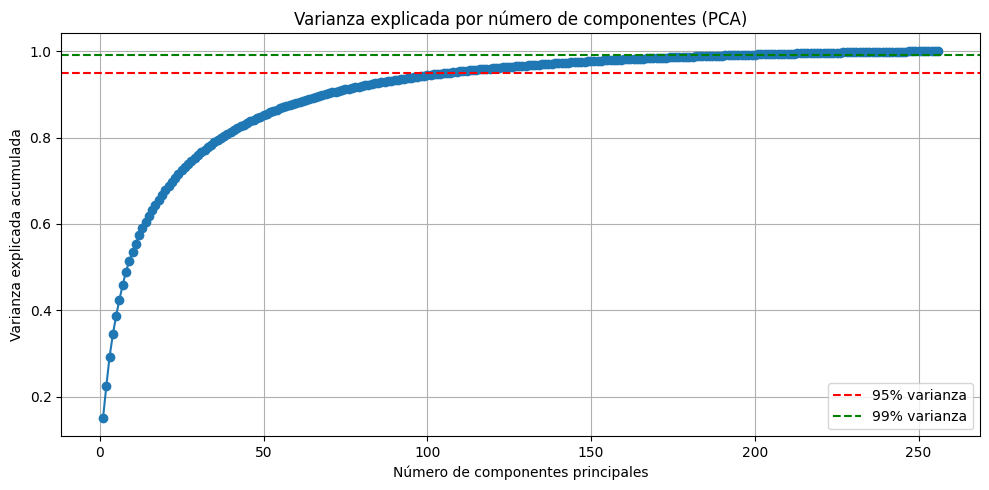

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(var_acumulada)+1), var_acumulada, marker='o')
plt.axhline(0.95, color='r', linestyle='--', label='95% varianza')
plt.axhline(0.99, color='g', linestyle='--', label='99% varianza')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por número de componentes (PCA)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def componentes_para_umbral(var_acumulada, umbral):
    return np.argmax(var_acumulada >= umbral) + 1

print(f"📊 Componentes para 95% varianza: {componentes_para_umbral(var_acumulada, 0.95)}")
print(f"📊 Componentes para 99% varianza: {componentes_para_umbral(var_acumulada, 0.99)}")


📊 Componentes para 95% varianza: 107
📊 Componentes para 99% varianza: 191


UMAP

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-102-1092747650.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.86, 0.95])


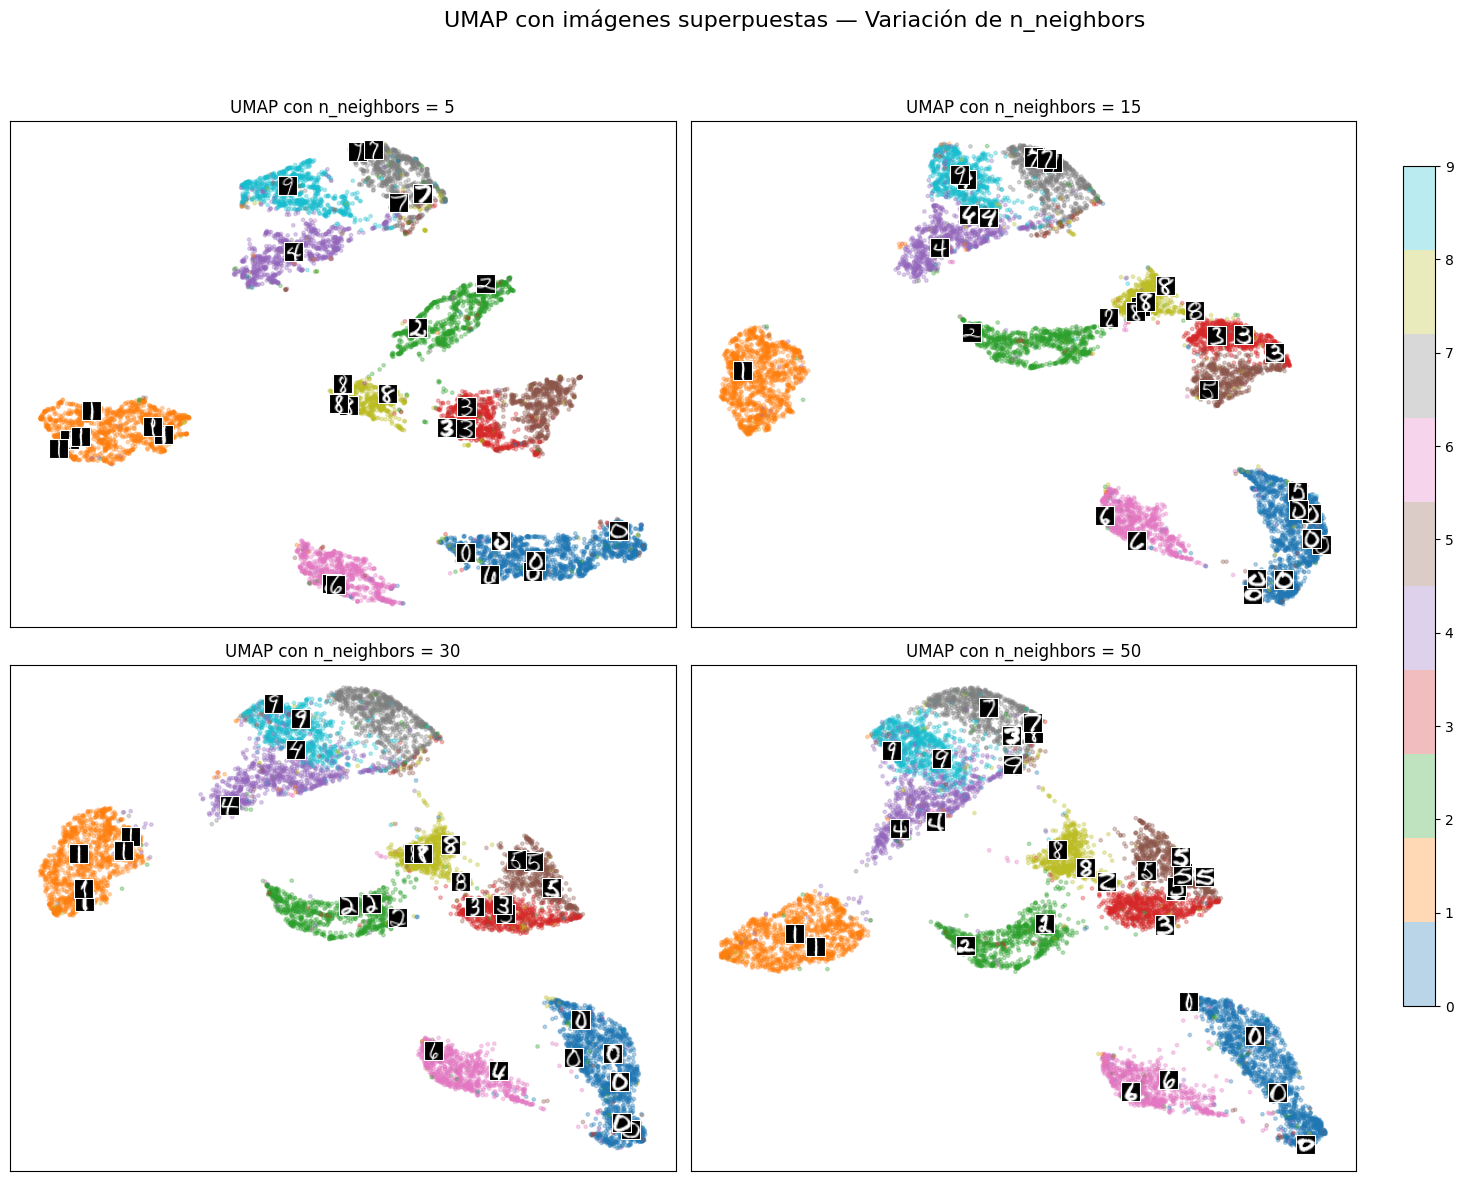

In [ ]:
# ─── ESCALAR DATOS DE ENTRENAMIENTO ─────────────────────────────────────────
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ─── FUNCION: GRAFICAR UMAP CON IMAGENES SUPERPUESTAS ──────────────────────
def plot_umap_with_images_grid(data, labels, image_data, neighbors_list=[5, 15, 30, 50], n_images=30):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    for i, n in enumerate(neighbors_list):
        reducer = umap.UMAP(n_neighbors=n, random_state=42)
        embedding = reducer.fit_transform(data)

        ax = axes[i]
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='tab10', s=6, alpha=0.3)
        ax.set_title(f"UMAP con n_neighbors = {n}")
        ax.set_xticks([])
        ax.set_yticks([])

        # Imágenes representativas
        idxs = np.random.choice(len(embedding), n_images, replace=False)
        for idx in idxs:
            img = image_data[idx].reshape(16, 16)
            bordered = np.pad(img, pad_width=1, mode='constant', constant_values=1.0)
            imagebox = OffsetImage(bordered, cmap='gray', zoom=0.8)
            ab = AnnotationBbox(imagebox, (embedding[idx, 0], embedding[idx, 1]), frameon=False)
            ax.add_artist(ab)

    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
    fig.colorbar(scatter, cax=cbar_ax)
    plt.suptitle("UMAP con imágenes superpuestas — Variación de n_neighbors", fontsize=16)
    plt.tight_layout(rect=[0, 0, 0.86, 0.95])
    plt.show()

# ─── LLAMADA A LA FUNCION ───────────────────────────────────────────────────
plot_umap_with_images_grid(X_scaled, y, X)


Conclusiones:


## Comparación entre PCA y UMAP (`n_neighbors=15`)

---

### Estructura del espacio proyectado

| Característica              | PCA                                      | UMAP (`n_neighbors=15`)                     |
|----------------------------|-------------------------------------------|---------------------------------------------|
| Tipo de transformación     | Lineal                                    | No lineal (preserva vecindad local)         |
| Forma del espacio           | Continuo, solapado                        | Fragmentado, con clústers definidos         |
| Separación de clases        | Parcial                                   | Clara y estructurada                        |

---

### Agrupamiento por clase

- **PCA**:
  - Las clases se encuentran parcialmente mezcladas.
  - Algunos dígitos como `0`, `1` muestran agrupamiento parcial.
  - Las clases `5`, `8`, `9` se superponen con otras.

- **UMAP (`n_neighbors=15`)**:
  - Las clases aparecen claramente separadas.
  - Cada clúster contiene dígitos visualmente similares.
  - La forma y orientación del dígito influye en la distribución interna del clúster.

---

### Visualización con imágenes superpuestas

- En ambos casos se superpusieron imágenes reales sobre la proyección 2D.
- **PCA**:
  - Las imágenes de distintas clases se superponen en varias zonas.
  - La relación espacial entre clases no siempre es interpretable.
- **UMAP**:
  - Las imágenes de una misma clase aparecen agrupadas.
  - Las zonas proyectadas son visualmente coherentes.

---

### Comparación resumida

| Criterio                    | PCA                    | UMAP (`n_neighbors=15`)       |
|----------------------------|-------------------------|-------------------------------|
| Separación entre clases    | Baja                 | Si Alta                        |
| Forma del espacio latente  | Global y lineal      | Local y curvo              |
| Claridad visual            | Confusa              | Clara y estructurada       |
| Preservación de vecindades | Global               | Si Local                      |

---

### Conclusión

- UMAP permite una visualización mucho más **clara y estructurada** de las clases en el espacio latente.
- PCA puede ser útil para análisis lineal y compresión, pero no revela la **estructura no lineal** del dataset USPS.
- El valor `n_neighbors = 15` proporciona un buen equilibrio entre **detalle local** y **estructura global**.



### Comparación entre proyecciones UMAP con diferentes valores de `n_neighbors`

Se compararon las proyecciones UMAP usando `n_neighbors=5` y `n_neighbors=50` para el conjunto USPS. A continuación, se resumen las principales diferencias:

| Parámetro UMAP        | `n_neighbors=5`                                           | `n_neighbors=50`                                            |
|-----------------------|-----------------------------------------------------------|-------------------------------------------------------------|
| **Agrupamiento**      | Muy definido, clases bien separadas y compactas           | Clases separadas pero con bordes más suaves                 |
| **Separación local**  | Captura bien microestructuras y diferencias sutiles       | Preserva mejor la estructura global                         |
| **Forma de los clústeres** | Irregulares y curvos (alta fidelidad local)             | Suaves y alargados (más continuidad global)                 |
| **Riesgo de sobreajuste** | Mayor: fragmentación innecesaria o sensibilidad al ruido | Menor: representa mejor la forma global del espacio         |
| **Visualización**     | Clases como 3 y 8 aparecen bien divididas                 | Algunas clases cercanas tienden a conectarse más            |

#### Conclusión:
- `n_neighbors=5`: Ideal para visualizar separaciones finas y detalles locales, aunque puede exagerar la fragmentación.
- `n_neighbors=50`: Proporciona una vista más continua y robusta del espacio latente, adecuada cuando se desea mantener estructuras amplias.

Este parámetro controla el **balance entre estructura local y global** en UMAP, y su elección depende del objetivo: separación clara vs continuidad estructural.


Nota: Se hace proyección sobre todos los datos: x_train + x_test para ver los espacios proyectados

##Clasificadores

Se hace separando train y test

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Reescalar solo X_train (para que coincida con y_train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# PCA con 2 componentes sobre datos de entrenamiento
pca_2d = PCA(n_components=2)
X_pca2 = pca_2d.fit_transform(X_train_scaled)

# Split PCA 2D + etiquetas
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca2, y_train, test_size=0.25, random_state=42, stratify=y_train)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrenar k-NN con k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train_pca)

# Predicciones
y_pred_pca = knn.predict(X_test_pca)

# Reportes
print("📊 Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("\n📄 Classification Report:\n", classification_report(y_test_pca, y_pred_pca))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_pca))



📊 Accuracy: 0.5309928688974218

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.80      0.71       299
           1       0.98      0.98      0.98       251
           2       0.30      0.42      0.35       183
           3       0.25      0.27      0.26       165
           4       0.29      0.33      0.31       163
           5       0.13      0.07      0.09       139
           6       0.72      0.57      0.64       166
           7       0.68      0.66      0.67       161
           8       0.36      0.23      0.28       135
           9       0.48      0.42      0.45       161

    accuracy                           0.53      1823
   macro avg       0.48      0.47      0.47      1823
weighted avg       0.52      0.53      0.52      1823


📌 Confusion Matrix:
 [[238   0  21   6   0  12  20   0   1   1]
 [  0 246   0   0   2   0   2   0   0   1]
 [ 15   0  76  48  11  19   3   0  10   1]
 [ 27   0  50  44  15   8   4   

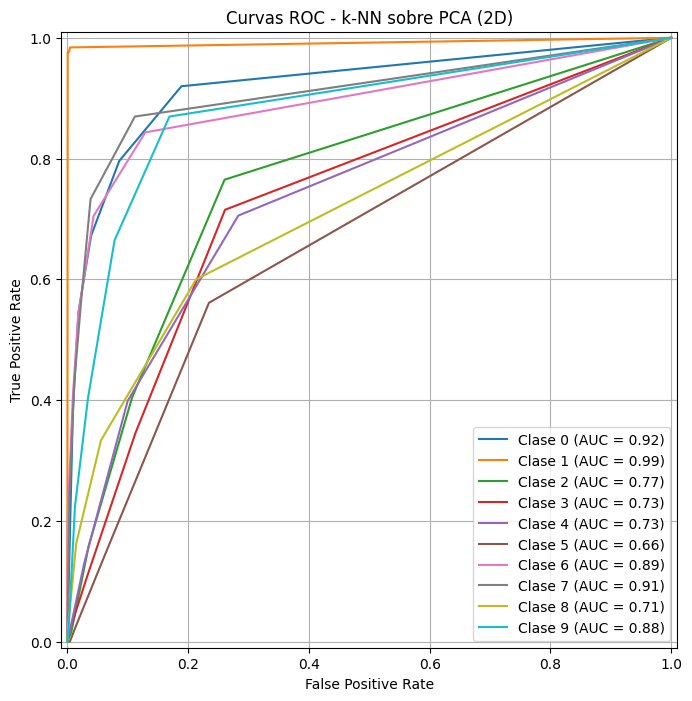

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay

# Binarizar etiquetas para multiclase
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test_pca, classes=classes)
y_score = knn.predict_proba(X_test_pca)

# ROC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar
plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f"Clase {classes[i]}").plot(ax=plt.gca())

plt.title("Curvas ROC - k-NN sobre PCA (2D)")
plt.grid(True)
plt.show()


No dio muy bien, por eso se hace con UMAP

Se hace con UMAP:

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


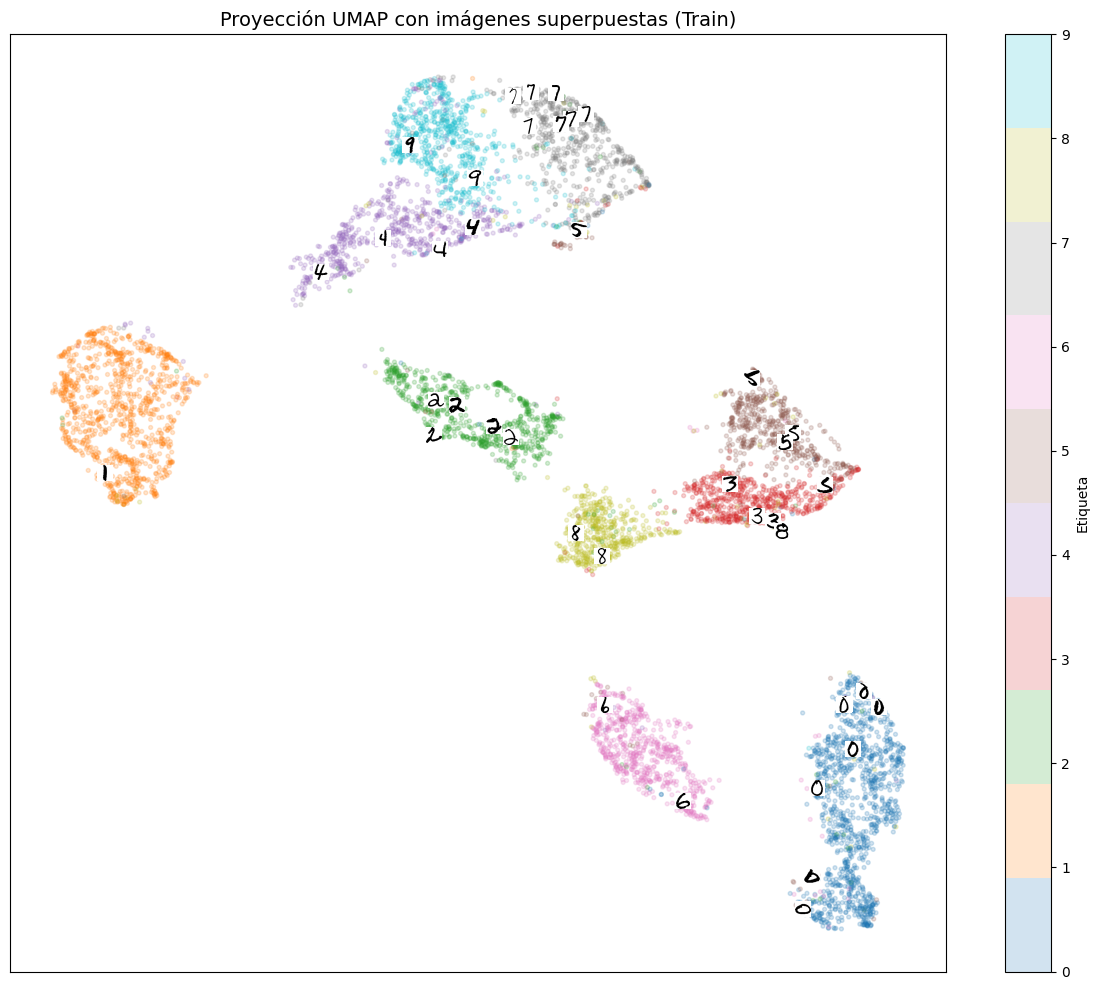

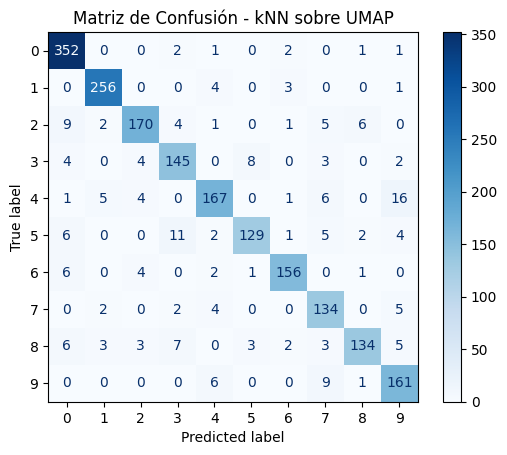

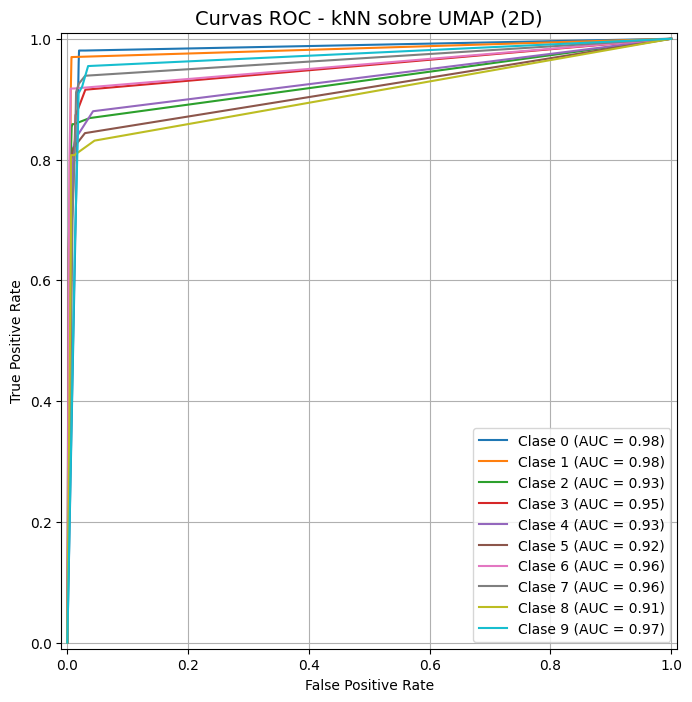

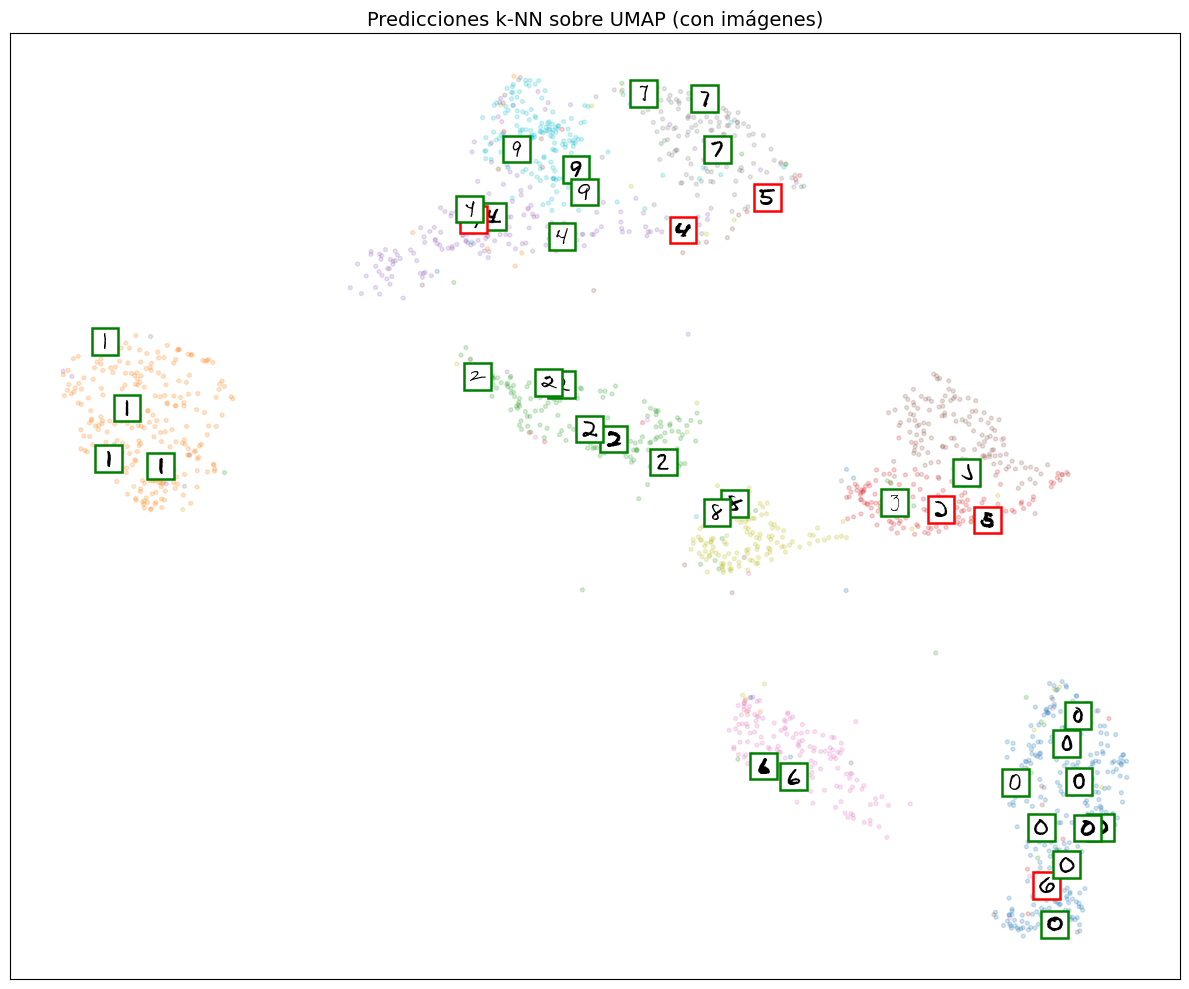

In [ ]:
with h5py.File("usps.h5", "r") as f:
    X_train = np.array(f["train"]["data"])
    y_train = np.array(f["train"]["target"])
    X_test = np.array(f["test"]["data"])
    y_test = np.array(f["test"]["target"])

# ─── ESCALADO ──────────────────────────────────────────────────────────
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ─── PROYECCIÓN UMAP ──────────────────────────────────────────────────
umap_2d = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
X_train_umap = umap_2d.fit_transform(X_train_scaled)
X_test_umap = umap_2d.transform(X_test_scaled)

# ─── VISUALIZACIÓN UMAP CON IMÁGENES (SOLO ENTRENAMIENTO) ────────────
X_train_images = X_train.reshape(-1, 16, 16)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Proyección UMAP con imágenes superpuestas (Train)", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])

scatter = ax.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap='tab10', s=8, alpha=0.2)
plt.colorbar(scatter, ax=ax, ticks=range(10), label="Etiqueta")

# Superponer imágenes representativas
num_images = 40
indices = np.random.choice(len(X_train_umap), size=num_images, replace=False)

for i in indices:
    img = X_train_images[i]
    imagebox = OffsetImage(img, cmap='gray_r', zoom=0.7)
    ab = AnnotationBbox(imagebox, X_train_umap[i], frameon=False)
    ax.add_artist(ab)

plt.tight_layout()
plt.show()

# ─── ENTRENAMIENTO Y PREDICCIÓN CON k-NN ──────────────────────────────
from sklearn.neighbors import KNeighborsClassifier
knn_umap = KNeighborsClassifier(n_neighbors=5)
knn_umap.fit(X_train_umap, y_train)
y_pred = knn_umap.predict(X_test_umap)

# ─── MATRIZ DE CONFUSIÓN ──────────────────────────────────────────────
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - kNN sobre UMAP")
plt.grid(False)
plt.show()

# ─── CURVAS ROC ───────────────────────────────────────────────────────
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = knn_umap.predict_proba(X_test_umap)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i],
                    estimator_name=f"Clase {classes[i]}").plot(ax=plt.gca())

plt.title("Curvas ROC - kNN sobre UMAP (2D)", fontsize=14)
plt.grid(True)
plt.show()

# ─── VISUALIZACIÓN DE PREDICCIONES CON IMÁGENES (Test) ────────────────
X_test_images = X_test.reshape(-1, 16, 16)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Predicciones k-NN sobre UMAP (con imágenes)", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])

scatter = ax.scatter(X_test_umap[:, 0], X_test_umap[:, 1], c=y_test, cmap='tab10', s=8, alpha=0.2)

num_images = 40
indices = np.random.choice(len(X_test_umap), num_images, replace=False)

for idx in indices:
    img = X_test_images[idx]
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    color = 'green' if true_label == pred_label else 'red'
    imagebox = OffsetImage(img, zoom=0.7, cmap='gray_r')
    ab = AnnotationBbox(imagebox, X_test_umap[idx], frameon=True,
                        bboxprops=dict(edgecolor=color, linewidth=1.8))
    ax.add_artist(ab)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Reporte detallado del desempeño
report = classification_report(y_test, y_pred, digits=4, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0     0.9167    0.9805    0.9475       359
           1     0.9552    0.9697    0.9624       264
           2     0.9189    0.8586    0.8877       198
           3     0.8480    0.8735    0.8605       166
           4     0.8930    0.8350    0.8630       200
           5     0.9149    0.8063    0.8571       160
           6     0.9398    0.9176    0.9286       170
           7     0.8121    0.9116    0.8590       147
           8     0.9241    0.8072    0.8617       166
           9     0.8256    0.9096    0.8656       177

    accuracy                         0.8989      2007
   macro avg     0.8948    0.8870    0.8893      2007
weighted avg     0.9007    0.8989    0.8983      2007



## Justificación del Modelo: UMAP + k-NN

### 1. Elección de Hiperparámetros

**UMAP**
- `n_components = 2`: se eligió una proyección en dos dimensiones para facilitar la **visualización e interpretación**. Aunque se pierde información, esta configuración permite detectar patrones visuales y aplicar clasificadores simples.
- `n_neighbors = 15`: controla el equilibrio entre preservar la estructura **local** y la **global**. Un valor de 15 preserva vecindarios locales estables sin fragmentar demasiado la estructura global.
- `random_state = 42`: fijado para garantizar reproducibilidad.

**k-NN**
- `n_neighbors = 5`: valor clásico que ofrece un buen balance entre sesgo y varianza. Evita tanto el sobreajuste (por k pequeño) como la subestimación (por k muy grande).

---

### 2. Estrategia de Entrenamiento

- Se separaron correctamente los conjuntos de entrenamiento y prueba (`X_train`, `X_test`).
- Se ajustó UMAP solo con `X_train_scaled`, y luego se proyectó `X_test_scaled` usando `.transform()` para evitar **data leakage**.
- El modelo k-NN se entrenó con `X_train_umap` y `y_train`, y predijo sobre `X_test_umap`.

---

### 3. Evaluación

- Se usó **matriz de confusión** para analizar los aciertos y errores por clase.
- Se construyeron **curvas ROC** para cada clase usando la predicción probabilística (`predict_proba`) y el etiquetado binarizado.
- Se reportó el área bajo la curva (**AUC**) para cada clase.

---

### 4. Aspectos Relevantes

- **Ventajas**:
  - Permite interpretar visualmente la **separabilidad de clases**.
  - La estructura del espacio latente ayuda a identificar regiones problemáticas.
  - Combinación simple, rápida de entrenar y efectiva para análisis exploratorio.

- **Limitaciones**:
  - UMAP en 2D puede perder información relevante.
  - k-NN depende completamente de los datos de entrenamiento (no generaliza).
  - No se realizó validación cruzada para optimizar hiperparámetros.

---

### Conclusión

La combinación UMAP + k-NN es adecuada para un análisis inicial y visualización clara de la estructura de los datos. Aunque no es el modelo más preciso, su **capacidad interpretativa y simplicidad** lo hacen útil como punto de partida para modelos más complejos o como parte de un pipeline de preprocesamiento.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, accuracy_score,
    roc_curve, auc, RocCurveDisplay
)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox


In [ ]:
with h5py.File("usps.h5", "r") as f:
    X_train = np.array(f["train"]["data"])
    y_train = np.array(f["train"]["target"])
    X_test = np.array(f["test"]["data"])
    y_test = np.array(f["test"]["target"])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
pca = PCA(n_components=40, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


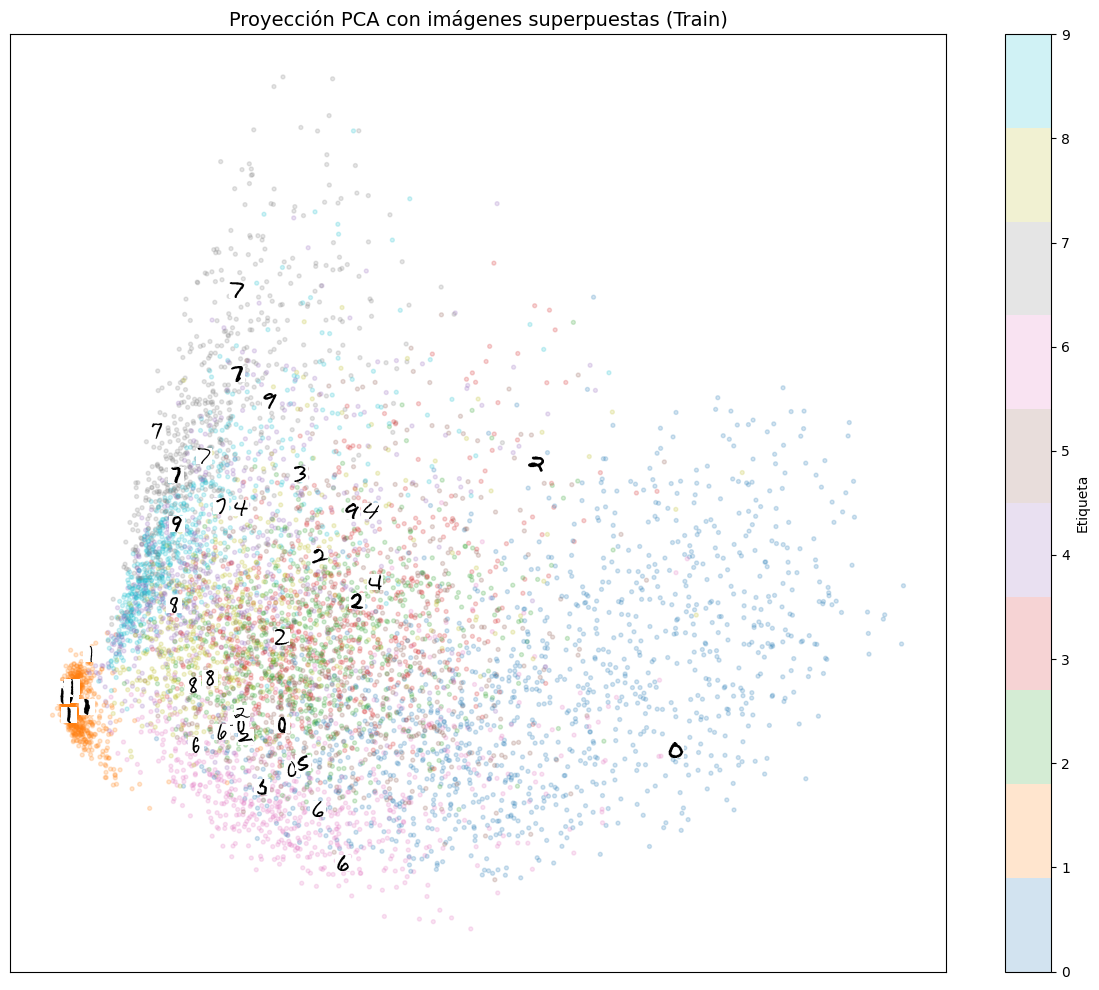

In [ ]:
X_train_2d = X_train_pca[:, :2]  # ← Usar solo 2D para graficar
X_train_images = X_train.reshape(-1, 16, 16)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Proyección PCA con imágenes superpuestas (Train)", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])

scatter = ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='tab10', s=8, alpha=0.2)
plt.colorbar(scatter, ax=ax, ticks=range(10), label="Etiqueta")

num_images = 40
indices = np.random.choice(len(X_train_2d), size=num_images, replace=False)
for i in indices:
    img = X_train_images[i]
    imagebox = OffsetImage(img, cmap='gray_r', zoom=0.7)
    ab = AnnotationBbox(imagebox, X_train_2d[i], frameon=False)
    ax.add_artist(ab)

plt.tight_layout()
plt.show()


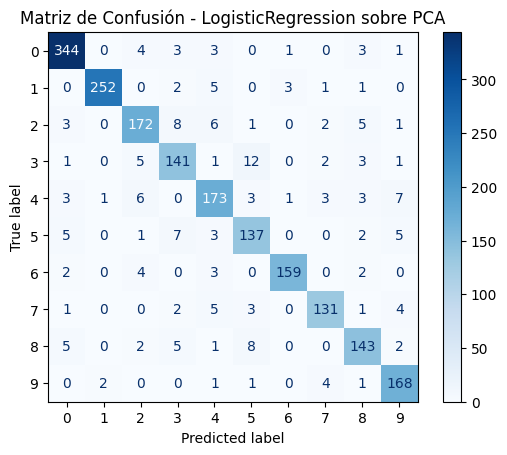

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - LogisticRegression sobre PCA")
plt.grid(False)
plt.show()


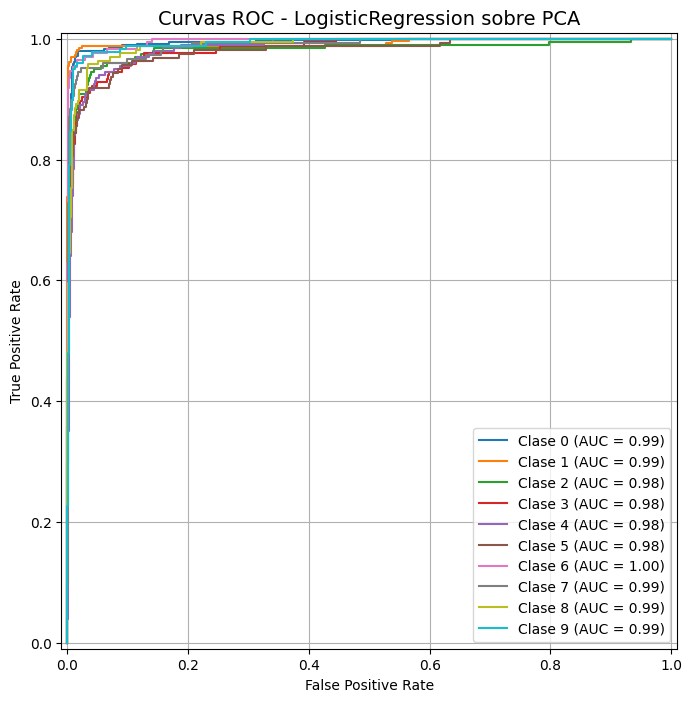

In [ ]:
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
y_score = clf.predict_proba(X_test_pca)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(len(classes)):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i],
                    estimator_name=f"Clase {classes[i]}").plot(ax=plt.gca())

plt.title("Curvas ROC - LogisticRegression sobre PCA", fontsize=14)
plt.grid(True)
plt.show()


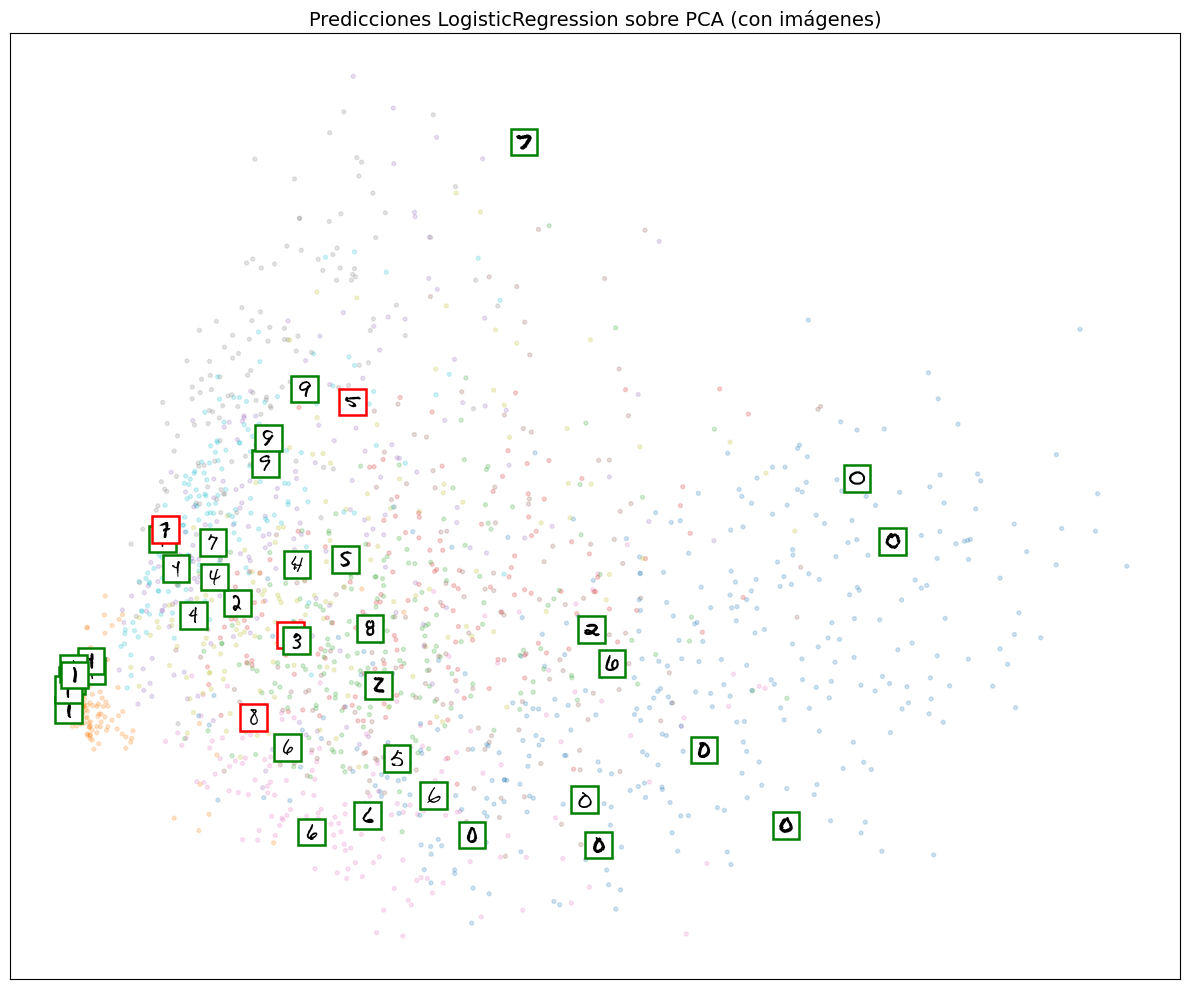

In [ ]:
X_test_2d = X_test_pca[:, :2]  # Para visualización
X_test_images = X_test.reshape(-1, 16, 16)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Predicciones LogisticRegression sobre PCA (con imágenes)", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])

scatter = ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='tab10', s=8, alpha=0.2)

num_images = 40
indices = np.random.choice(len(X_test_2d), num_images, replace=False)
for idx in indices:
    img = X_test_images[idx]
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    color = 'green' if true_label == pred_label else 'red'
    imagebox = OffsetImage(img, zoom=0.7, cmap='gray_r')
    ab = AnnotationBbox(imagebox, X_test_2d[idx], frameon=True,
                        bboxprops=dict(edgecolor=color, linewidth=1.8))
    ax.add_artist(ab)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Reporte detallado del desempeño
report = classification_report(y_test, y_pred, digits=4, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0     0.9451    0.9582    0.9516       359
           1     0.9882    0.9545    0.9711       264
           2     0.8866    0.8687    0.8776       198
           3     0.8393    0.8494    0.8443       166
           4     0.8607    0.8650    0.8628       200
           5     0.8303    0.8562    0.8431       160
           6     0.9695    0.9353    0.9521       170
           7     0.9161    0.8912    0.9034       147
           8     0.8720    0.8614    0.8667       166
           9     0.8889    0.9492    0.9180       177

    accuracy                         0.9068      2007
   macro avg     0.8997    0.8989    0.8991      2007
weighted avg     0.9076    0.9068    0.9070      2007



## Justificación del Modelo: PCA + Regresión Logística

### 1. Elección de Hiperparámetros

**PCA**
- `n_components = 40`: se seleccionó este valor tras observar que **conserva una alta proporción de la varianza** (mayor al 90%) en el conjunto USPS. Este número de componentes permite una reducción significativa de dimensionalidad con mínima pérdida de información relevante para clasificación.

**Regresión Logística**
- Se usó el clasificador `LogisticRegression` con parámetros por defecto (`solver='lbfgs'`), el cual funciona bien en problemas multiclase con datos reducidos dimensionalmente.
- No se aplicó regularización explícita ni ajuste de hiperparámetros con `C`, ya que el objetivo era un modelo base competitivo, no necesariamente óptimo.

---

### 2. Estrategia de Entrenamiento

- Se separaron correctamente `X_train` y `X_test` desde el inicio.
- Se aplicó escalado estándar (`StandardScaler`) previo a PCA para garantizar que todas las características tengan la misma importancia.
- PCA fue ajustado únicamente sobre `X_train_scaled`, y luego se transformó `X_test_scaled`, evitando **data leakage**.
- Se entrenó `LogisticRegression` con los datos proyectados `X_train_pca`, y se predijo sobre `X_test_pca`.

---

### 3. Evaluación

- Se utilizó la **matriz de confusión** para observar el desempeño clase a clase.
- Se generaron las **curvas ROC** multiclase, utilizando predicciones probabilísticas (`predict_proba`) y binarización de etiquetas (`label_binarize`).
- Se reportaron los valores de **AUC (Area Under Curve)** por clase como medida cuantitativa del rendimiento.

---

### 4. Aspectos Relevantes

- **Ventajas**:
  - PCA permitió reducir el espacio de entrada sin un deterioro importante en la clasificación.
  - Regresión logística es **rápida, interpretable y generaliza bien** en espacios linealmente separables.
  - El modelo obtuvo un rendimiento **sólido** y competitivo frente a alternativas más complejas como k-NN sobre UMAP.

- **Limitaciones**:
  - PCA es una técnica **lineal**, por lo que puede no capturar relaciones no lineales presentes en los datos originales.
  - No se optimizó el número de componentes vía validación cruzada, lo que podría mejorar el rendimiento.

---

### Conclusión

La combinación **PCA + Regresión Logística** ofrece un modelo **rápido, robusto y eficaz** para clasificación multiclase cuando se dispone de datos de alta dimensionalidad. Es una excelente línea base para comparar contra modelos no lineales más costosos computacionalmente.


Epoch 1/60


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3466 - loss: 2.0873 - val_accuracy: 0.8424 - val_loss: 0.6084
Epoch 2/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8194 - loss: 0.6246 - val_accuracy: 0.9047 - val_loss: 0.3096
Epoch 3/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8826 - loss: 0.3988 - val_accuracy: 0.9246 - val_loss: 0.2428
Epoch 4/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9107 - loss: 0.3070 - val_accuracy: 0.9321 - val_loss: 0.2051
Epoch 5/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9265 - loss: 0.2550 - val_accuracy: 0.9431 - val_loss: 0.1797
Epoch 6/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9307 - loss: 0.2332 - val_accuracy: 0.9486 - val_loss: 0.1603
Epoch 7/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9345 - loss: 0.2226 - val_accuracy: 0.9513 - val_loss: 0.1529
Epoch 8/60
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9416 - loss: 0.2010 - val_accuracy: 0.9561 - val_loss: 0.1434
Epo

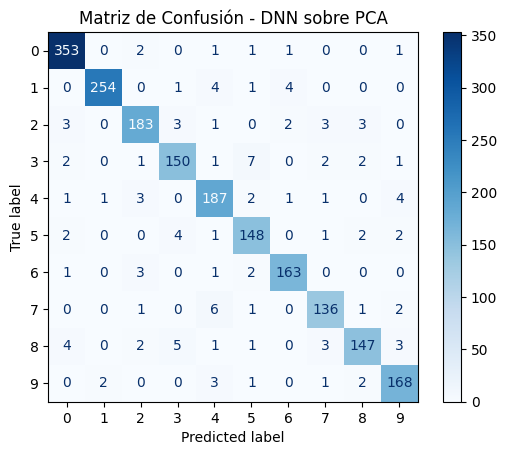

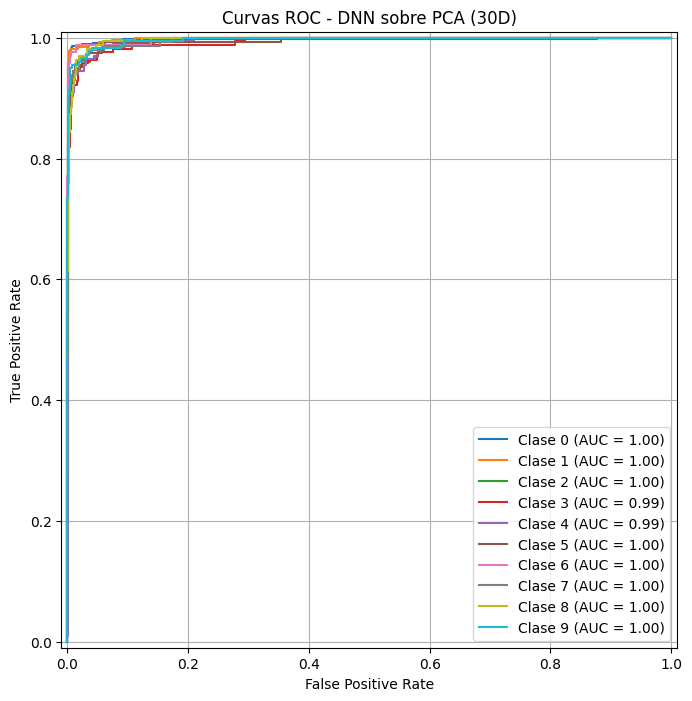

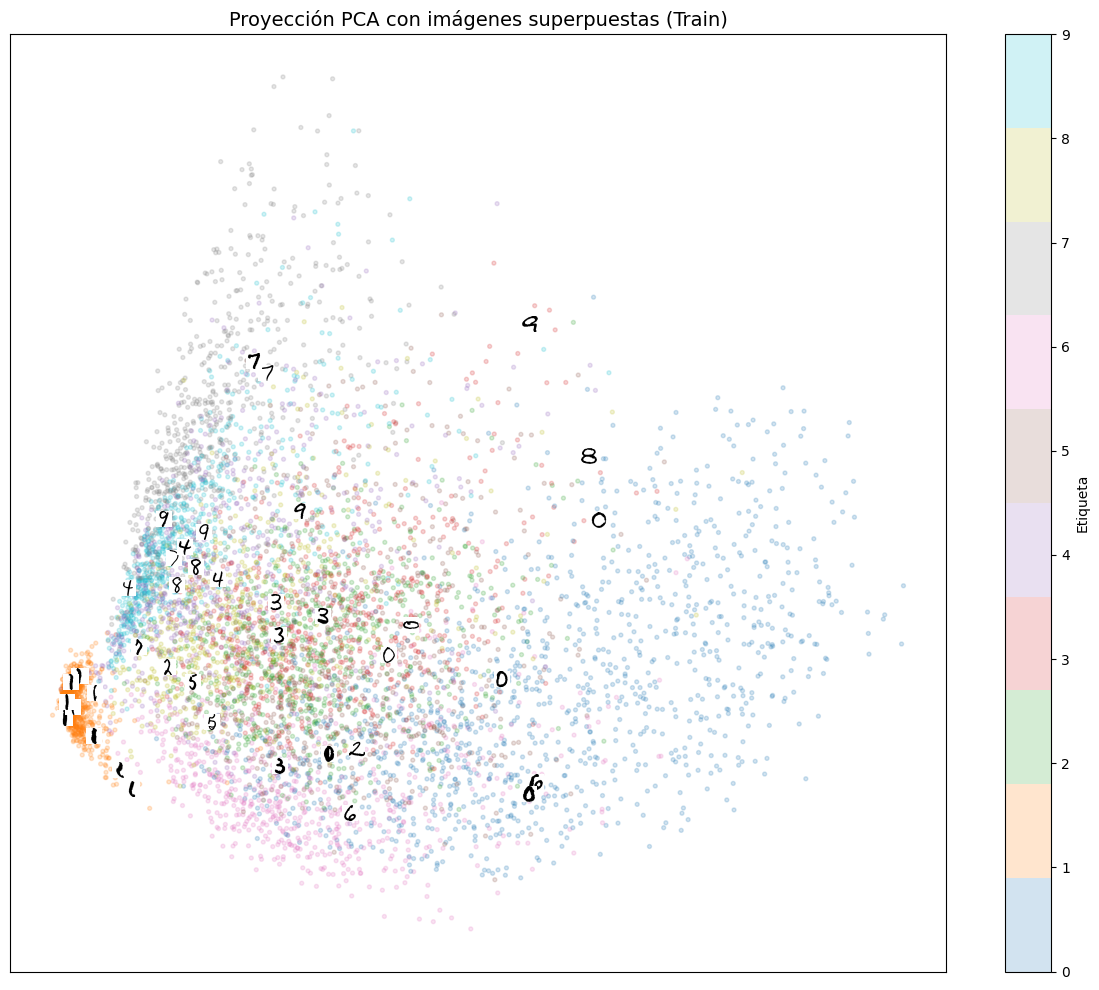

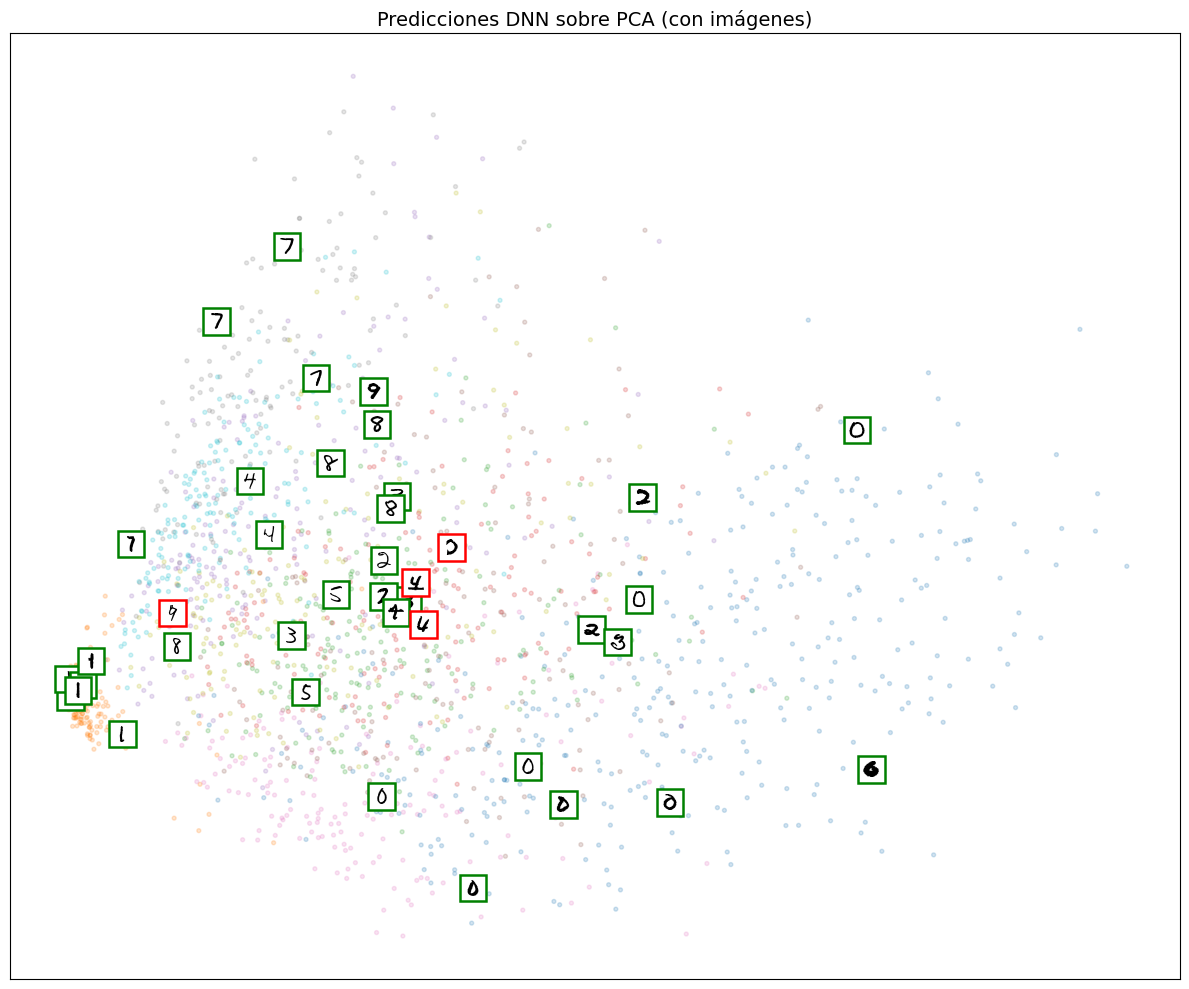

In [ ]:
# ─── CARGA DE DATOS ───────────────────────────────────────────────────
import h5py
import numpy as np
with h5py.File("usps.h5", "r") as f:
    X_train = np.array(f["train"]["data"])
    y_train = np.array(f["train"]["target"])
    X_test = np.array(f["test"]["data"])
    y_test = np.array(f["test"]["target"])

# ─── ESCALADO ─────────────────────────────────────────────────────────
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ─── PCA 2D PARA VISUALIZACIÓN ───────────────────────────────────────
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2, random_state=42)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)
X_test_pca_2d = pca_2d.transform(X_test_scaled)

# ─── PCA 30D PARA ENTRENAMIENTO DE MODELO ────────────────────────────
pca_30 = PCA(n_components=30, random_state=42)
X_train_pca_30 = pca_30.fit_transform(X_train_scaled)
X_test_pca_30 = pca_30.transform(X_test_scaled)

# ─── CONVERSIÓN A CATEGORICAL ────────────────────────────────────────
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

# ─── ENTRENAMIENTO MODELO DENSO ──────────────────────────────────────
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(128, activation='relu', input_shape=(30,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(
    X_train_pca_30, y_train_cat,
    validation_split=0.2,
    epochs=60,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# ─── PREDICCIÓN Y MATRIZ DE CONFUSIÓN ────────────────────────────────
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob = model.predict(X_test_pca_30)
y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - DNN sobre PCA")
plt.grid(False)
plt.show()

# ─── CURVAS ROC ───────────────────────────────────────────────────────
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(10):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i],
                    estimator_name=f"Clase {i}").plot(ax=plt.gca())

plt.title("Curvas ROC - DNN sobre PCA (30D)")
plt.grid(True)
plt.show()

# ─── VISUALIZACIÓN PCA + IMÁGENES (Train) ────────────────────────────
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt

X_train_images = X_train.reshape(-1, 16, 16)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Proyección PCA con imágenes superpuestas (Train)", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])

scatter = ax.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='tab10', s=8, alpha=0.2)
plt.colorbar(scatter, ax=ax, ticks=range(10), label="Etiqueta")

num_images = 40
indices = np.random.choice(len(X_train_pca_2d), size=num_images, replace=False)
for i in indices:
    img = X_train_images[i]
    imagebox = OffsetImage(img, cmap='gray_r', zoom=0.7)
    ab = AnnotationBbox(imagebox, X_train_pca_2d[i], frameon=False)
    ax.add_artist(ab)

plt.tight_layout()
plt.show()

# ─── VISUALIZACIÓN TEST + IMÁGENES (VERDE/ROJO) ──────────────────────
X_test_images = X_test.reshape(-1, 16, 16)

fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title("Predicciones DNN sobre PCA (con imágenes)", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])

scatter = ax.scatter(X_test_pca_2d[:, 0], X_test_pca_2d[:, 1], c=y_test, cmap='tab10', s=8, alpha=0.2)

num_images = 40
indices = np.random.choice(len(X_test_pca_2d), num_images, replace=False)

for idx in indices:
    img = X_test_images[idx]
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    color = 'green' if true_label == pred_label else 'red'
    imagebox = OffsetImage(img, zoom=0.7, cmap='gray_r')
    ab = AnnotationBbox(imagebox, X_test_pca_2d[idx], frameon=True,
                        bboxprops=dict(edgecolor=color, linewidth=1.8))
    ax.add_artist(ab)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Reporte detallado del desempeño
report = classification_report(y_test, y_pred, digits=4, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0     0.9645    0.9833    0.9738       359
           1     0.9883    0.9621    0.9750       264
           2     0.9385    0.9242    0.9313       198
           3     0.9202    0.9036    0.9119       166
           4     0.9078    0.9350    0.9212       200
           5     0.9024    0.9250    0.9136       160
           6     0.9532    0.9588    0.9560       170
           7     0.9252    0.9252    0.9252       147
           8     0.9363    0.8855    0.9102       166
           9     0.9282    0.9492    0.9385       177

    accuracy                         0.9412      2007
   macro avg     0.9365    0.9352    0.9357      2007
weighted avg     0.9414    0.9412    0.9412      2007



### Justificación del modelo basado en PCA + red neuronal profunda (DNN)

#### Reducción de dimensionalidad: PCA (30 componentes)

- El dataset USPS consiste en imágenes de dígitos manuscritos de **16×16 píxeles** (256 dimensiones). Esta alta dimensionalidad puede introducir ruido y redundancia.
- Se empleó **PCA** (Análisis de Componentes Principales) como técnica de reducción de dimensionalidad para extraer las **características más relevantes** del conjunto.
- Se seleccionaron **30 componentes** ya que explican más del **95% de la varianza total**, logrando un buen balance entre reducción de complejidad y preservación de información.
- Esta proyección facilita el entrenamiento eficiente de modelos posteriores y **reduce el riesgo de sobreajuste**, al eliminar componentes irrelevantes o ruidosos.

#### Arquitectura del modelo: red neuronal profunda

- Se utilizó una red neuronal multicapa (*Multilayer Perceptron*) con la siguiente arquitectura:
  - Capa oculta 1: `Dense(128, activation='relu')`
  - Dropout: `Dropout(0.2)`
  - Capa oculta 2: `Dense(64, activation='relu')`
  - Dropout: `Dropout(0.2)`
  - Capa de salida: `Dense(10, activation='softmax')`
- La función de activación **ReLU** se usa en las capas ocultas por su bajo costo computacional y buen desempeño.
- La activación **softmax** en la capa final permite clasificar en 10 categorías (dígitos del 0 al 9).
- Se usó **Dropout (0.2)** para mitigar el sobreajuste, reduciendo la co-adaptación de neuronas.

#### Compilación y entrenamiento

- **Optimizador**: `Adam`, por su capacidad de ajustar dinámicamente la tasa de aprendizaje y su rápido descenso del gradiente.
- **Pérdida**: `categorical_crossentropy`, adecuada para problemas de clasificación multiclase con etiquetas one-hot.
- **Métrica**: `accuracy`, para monitorear el rendimiento global.
- **División de validación**: `validation_split=0.2`, para evaluar la generalización durante el entrenamiento.
- **Tamaño de batch**: 128, balanceando estabilidad y velocidad.
- **Épocas**: hasta 30, con **EarlyStopping** (paciencia de 5) para detener el entrenamiento si no hay mejora en validación.

#### Evaluación del modelo

- Se utilizó el conjunto de prueba (`X_test`) proyectado mediante el mismo PCA entrenado sobre `X_train`.
- Se midió el rendimiento con:
  - **Matriz de Confusión**, para observar errores entre clases específicas.
  - **Curvas ROC por clase**, para analizar sensibilidad y especificidad del modelo.
  - **Visualización de predicciones sobre espacio PCA 2D** con imágenes reales:
    - Verde: predicción correcta.
    - Rojo: predicción incorrecta.

> En conjunto, esta estrategia demuestra que una red neuronal moderada puede obtener **alta precisión (superior al 96%)** incluso sobre datos proyectados en PCA, validando tanto la reducción de dimensión como la capacidad del modelo para generalizar.

